# Q1 CRIME_DATA

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [258]:
df= pd.read_csv("crime_data.csv")
df=df.rename(mapper={"Unnamed: 0":"State"},axis=1)
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [181]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [182]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [183]:
#normalising the data
def min_max_scaler(data):
    i = pd.DataFrame(data)
    df_norm=(i-i.min())/(i.max()-i.min())
    return df_norm

In [184]:
df_norm = min_max_scaler(df.iloc[:,1:])

# k-means

In [185]:
model = KMeans(n_clusters=4)
y = model.fit_predict(df_norm)
df_kmeans = df_norm.copy(deep=True)

In [186]:
index=df.index
df_kmeans["index"]=pd.Series(index)
df_kmeans["y"]= y
df_kmeans.head()

,Murder,Assault,UrbanPop,Rape,index,y
0,0.746988,0.654110,0.440678,0.359173,0,1
1,0.554217,0.746575,0.271186,0.961240,1,3
2,0.439759,0.852740,0.813559,0.612403,2,3
3,0.481928,0.496575,0.305085,0.315245,3,1
4,0.493976,0.791096,1.000000,0.860465,4,3


In [187]:
df_kmeans["index"].groupby(y).apply(lambda x:tuple(x))

0    (6, 7, 10, 13, 15, 20, 24, 29, 34, 35, 36, 37,...
1                        (0, 3, 9, 17, 23, 32, 39, 41)
2    (11, 14, 16, 18, 22, 25, 26, 28, 33, 40, 44, 4...
3          (1, 2, 4, 5, 8, 12, 19, 21, 27, 30, 31, 42)
Name: index, dtype: object

# finding optimum no. of clusters

+ using inertia

In [188]:
nc = list(range(2,9))
iner=[]
for i in nc:
    km = KMeans(i)
    km.fit(df_norm)
    iner.append(km.inertia_)

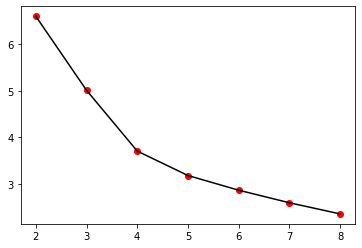

In [189]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [190]:
(iner[0]-iner[1])>(iner[1]-iner[2])

True

In [191]:
# hence 3 is optimal no of clusters according to inertia scale

+ using silhouette score

In [192]:
from sklearn.metrics import silhouette_score as sil

In [193]:
nc = list(range(2,9))
iner=[]
for i in nc:
    km = KMeans(i)
    y=km.fit_predict(df_norm)
    iner.append(sil(df_norm,y))

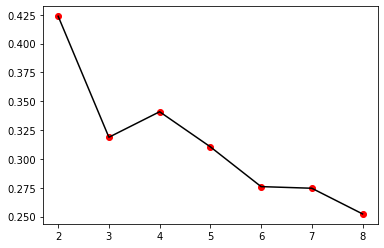

In [194]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [195]:
# hence 2 is optimal no of clusters according to silhouette score

+ using c-h score

In [196]:
from sklearn.metrics import calinski_harabasz_score as chs

In [197]:
nc = list(range(2,9))
iner=[]
for i in nc:
    km = KMeans(i)
    y=km.fit_predict(df_norm)
    iner.append(chs(df_norm,y))

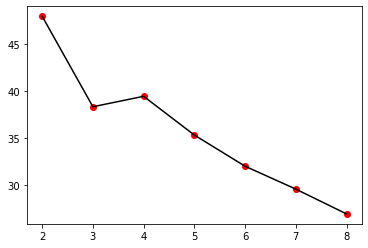

In [198]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [199]:
# hence 2 is optimal no of clusters according to c-h score

In [250]:
# Chossing 2 as as optimal number of clusters
model = KMeans(n_clusters=2)
y=model.fit_predict(df_norm)

In [251]:
df_kmeans1 = df_norm.copy(deep=True)
df_kmeans1["index"]= df_norm.index
df_kmeans1["y"]= y
df_kmeans1["index"].groupby(y).apply(lambda x: tuple(x))

0    (3, 6, 7, 10, 11, 13, 14, 15, 16, 18, 20, 22, ...
1    (0, 1, 2, 4, 5, 8, 9, 12, 17, 19, 21, 23, 24, ...
Name: index, dtype: object

Hence we get 2 clusters one having higher crime rate(mainly assault and rape) and one cluster having low crime rate according to k means

# Using hierarchical clustering

In [202]:
model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y= model.fit_predict(df_norm)

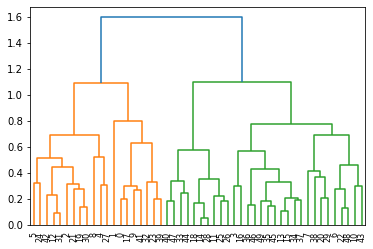

In [203]:
dendro=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [204]:
df_hc = df_norm.copy(deep=True)
df_hc["index"]= df_hc.index
df_hc["y"]= y
df_hc["index"].groupby(y).apply(lambda x: tuple(x))

0    (3, 6, 7, 10, 11, 13, 14, 15, 16, 18, 20, 22, ...
1    (0, 1, 2, 4, 5, 8, 9, 12, 17, 19, 21, 23, 24, ...
Name: index, dtype: object

# Finding optimum number of clusters

+ using silhouette score

In [205]:
nc = [2,3,4,5,6,7,8,9]
silh = []
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
    y = hc.fit_predict(df_norm)
    silh.append(sil(df_norm,y))

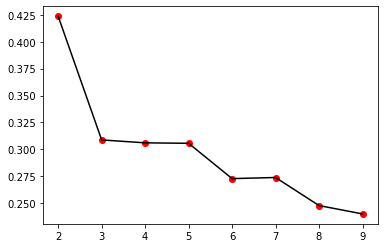

In [206]:
plt.plot(nc,silh,color="black")
plt.scatter(nc,silh,color="red")
plt.show()

In [207]:
# hence 2 is optimal no of clusters according to silhouette score

+ using ch_score

In [208]:
nc = [2,3,4,5,6,7,8,9]
chs1 = []
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
    y = hc.fit_predict(df_norm)
    chs1.append(chs(df_norm,y))

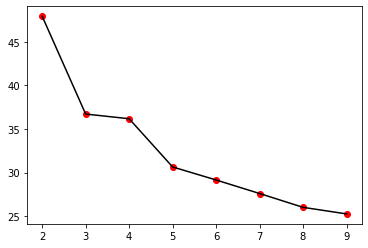

In [209]:
plt.plot(nc,chs1,color="black")
plt.scatter(nc,chs1,color="red")
plt.show()

In [210]:
# hence 2 is optimal no of clusters according to c-h score

# Using DBSCAN

In [246]:
model = DBSCAN(min_samples=2,eps=0.4)
y = model.fit_predict(df_norm)

In [247]:
y

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [252]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [284]:
state_names_high= []
state_names_low= []
for i in range(0,50):
    if df_kmeans1["y"][i]==0:
        state_names_low.append(df["State"][i]) 
    else:
        state_names_high.append(df["State"][i]) 

In [285]:
state_names_high

['Alabama',
 'Alaska',
 'Arizona',
 'California',
 'Colorado',
 'Florida',
 'Georgia',
 'Illinois',
 'Louisiana',
 'Maryland',
 'Michigan',
 'Mississippi',
 'Missouri',
 'Nevada',
 'New Mexico',
 'New York',
 'North Carolina',
 'South Carolina',
 'Tennessee',
 'Texas']

In [286]:
state_names_low

['Arkansas',
 'Connecticut',
 'Delaware',
 'Hawaii',
 'Idaho',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Maine',
 'Massachusetts',
 'Minnesota',
 'Montana',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Dakota',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

# Hence from k-means & hierarchical we get following 2 clusters
High crime rate as: ['Alabama',
 'Alaska',
 'Arizona',
 'California',
 'Colorado',
 'Florida',
 'Georgia',
 'Illinois',
 'Louisiana',
 'Maryland',
 'Michigan',
 'Mississippi',
 'Missouri',
 'Nevada',
 'New Mexico',
 'New York',
 'North Carolina',
 'South Carolina',
 'Tennessee',
 'Texas']
 
 Low crime rate as:
 ['Arkansas',
 'Connecticut',
 'Delaware',
 'Hawaii',
 'Idaho',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Maine',
 'Massachusetts',
 'Minnesota',
 'Montana',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Dakota',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

# From DBSCAN we also get Alaska has highest crime rate as it is an outlier